In [1]:
## 3.1 MNIST
import os
from scipy.io import loadmat

mnist_path = "./mnist-original.mat"

mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Done!")

Done!


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

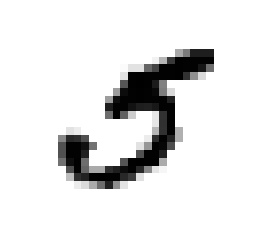

5.0

In [6]:
# using matplotlib to display the images
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[36000]

In [7]:
# mnist is already split into training and test set: first 60 000 and last 10 000
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# We can shuffle the training set
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]


In [8]:
## 3.2 Training a Binary Classifier
# simplify the problem and try to identify number "5"

y_train_5 = (y_train == 5)
y_train_5

array([False, False, False, ..., False, False, False])

In [9]:
y_test_5 = (y_test == 5)

In [10]:
# SGD classifier: capable of handling large data sets
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [11]:
sgd_clf.predict([some_digit])

array([ True])

In [12]:
## 3.3 Performance Measure
# 3.3.1 Measure accuracy using Cross Validation
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([0.87027594, 0.85454273, 0.86627994])

In [13]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")


array([0.90715, 0.9097 , 0.9121 ])

In [14]:
# 3.3.2 Confusion Matrix
# use cross_val_predict() function
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

# Use the confusion_matrix() function:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([[53666,   913],
       [ 1575,  3846]])

In [15]:
# Each row in the confusion matrix represents an actual class
# Each column is a predicted class
# Precision: accuracy of the positive predictions
# Precision = TP / (TP + FP)
# Recall: TP/(TP + FN)

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred)


0.8081529733137214

In [16]:
recall_score(y_train_5, y_train_pred)

0.7094631986718317

In [17]:
# We usually combine precision and recall into one metric called F1 score
# It is a harmonic mean of precision and recall
# F1 = 2 / (1 / precision + 1 / recall)

from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.755599214145383

In [18]:
# F1 score tends to be large when both precision and recall are good
# but it may not always be what you want
# To catch shoplifters, you will want high recall even if you get many false alarms
# but we cannot always get high precisions and recalls, there is a tradeoff

# 3.3.4 Precision Recall Tradeoff
# sklearn does not let your set threshold(score) directly but it does give you access to the decision scores
# that it uses to make predictions instead of calling predict() method, you can call its decision_function()
# method which returns a score for each instance, and then make predictions based on those scores using any threshold
# you want

y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([90369.41878512])

In [19]:
threshold = -80000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

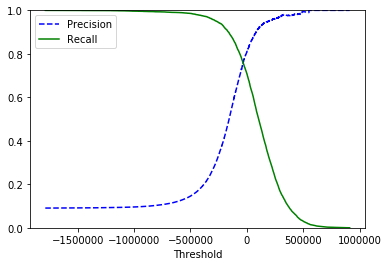

In [20]:
# How can you decide which threshold to use?
# First you need to get scores of all instances in the training set using cross_val_predict() function
# but specifying that you want it to return decision scores instead of predictions
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

# compute precision and recall for all possible thresholds using precision_recall_curve()

from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [21]:
# Now you decide to aim for 90% precision, and the score is 700000
y_train_pred_90 = (y_scores > 70000)
precision_score(y_train_5, y_train_pred_90)


0.888920698539937

In [22]:
recall_score(y_train_5, y_train_pred_90)

0.5727725511898174

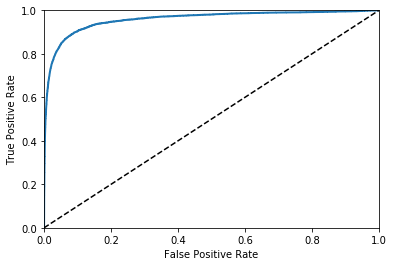

In [23]:
# Precision can sometimes go down a bit, and finally goes up, e.g from 4/5 down to 3/4
# 3.3.5 ROC Curve
# ROC : TPR / FPR

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr, tpr)
plt.show()

In [24]:
# There is also a tradeoff: the higher TPR, also higher FPR
# One way to compare classifiers is to use ROC AUC (area under curve)
# A perfect classifier will have AUC = 1, and a purely random classifier will have a AUC = 0.5

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9585293217210307

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


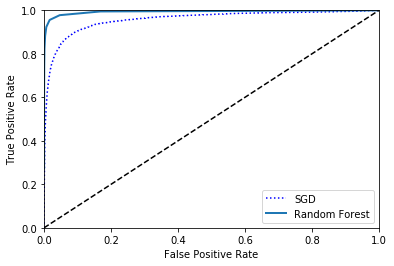

In [25]:
# You should choose Precision/Recall curve whenever the positive class is rare or when
# you care more about the false positives than false negatives and the ROC curve otherwise
# in this case, because we have much more negatives(non-5s), so the ROC curve is fairly good
# but the PR curve shows theres is room for improvement

# Let's train a RandomForestClassifier, but it does not have decision_function(), 
# instead it has predict_proba() method which returns an array containing a row per instance and
# a column per class, each containing the probability that the given instance belongs to each class

from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

y_scores_forest = y_probas_forest[:, 1] # Score = probas of positive class in our case
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

In [26]:
roc_auc_score(y_train_5, y_scores_forest)

0.993727829130765

In [27]:
## 3.4 Multiclass Classification
# For algorithms which cannot do multiclass classification, we can adopt strategies of OvA and OvO
# Scikit-learn detects when you try to use a binary classification algorithm for a multiclass classification task
# and it automatically runs OvA (except for SVM it runs OvO). Let's try this with SGDClassifier
sgd_clf.fit(X_train, y_train) # y_train not y_train_5
sgd_clf.predict([some_digit])

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([5.])

In [28]:
# Scores from the 10 binary classifiers under the hood
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ -24853.91808809, -425695.86793621, -199644.36952078,
        -356920.15890659, -490926.1619573 ,   90369.41878512,
        -648233.07850006, -288257.87141609, -698241.10950774,
        -501272.75047886]])

In [29]:
np.argmax(some_digit_scores)

5

In [30]:
sgd_clf.classes_


array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [31]:
sgd_clf.classes_[5]

5.0

In [32]:
# If you want Scikit-learn to force use one-versus-one and one-versus-all you 
# can use the OneVsOneClassifier or OneVsRestClassifier classes, pass a binary classifier to its constructor

from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([5.])

In [33]:
# There are 10 * (10 - 1) / 2 ovo classifiers 
# for each pair of category of the label
len(ovo_clf.estimators_)

45

In [34]:
# Training a randomForestClassifier
# RandomForestClassifiers can classify instances into multiple classes
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [35]:
forest_clf.predict_proba([some_digit])


array([[0.3, 0. , 0. , 0. , 0. , 0.7, 0. , 0. , 0. , 0. ]])

In [36]:
# Now we use cross validationsgd_clf to validate the classifiers
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([0.87027594, 0.85454273, 0.86627994])

In [37]:
# Simply scaling the input will increase the accuracy to above 90%
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=True, with_std=True)


In [38]:
print(scaler.mean_)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.10000000e-03 7.83333333e-03 3.60000000e-03 1.50000000e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.66666667e-04 9.16666667e-04 9.28333333e-03 2.42833333e-02
 4.37166667e-02 6.41000000e-02 1.20133333e-01 1.60733333e-01
 1.74183333e-01 1.77433333e-01 1.89316667e-01 1.74150000e-01
 1.86933333e-01 1.53650000e-01 1.00116667e-01 7.12333333e-02
 5.38166667e-02 2.13666667e-02 1.00833333e-02 3.53333333e-03
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.06666667e-03 7.00000000e-04
 6.95000000e-03 5.48333333e-03 4.71000000e-02 1.38400000e-01
 2.64183333e-01 5.066166

In [39]:
X_train_scaled = scaler.transform(X_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([0.90871826, 0.91369568, 0.91023654])

In [41]:
## 3.5 Error Analysis
# We need to find ways to imporve the model
# analyse the types of errors it made

# First you can look at the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
/usr/local/lib/python3.6/dist-packages/s

array([[5728,    3,   28,   11,   11,   49,   42,   11,   37,    3],
       [   1, 6482,   51,   27,    5,   35,    5,   12,  111,   13],
       [  49,   37, 5365,   90,   84,   20,   85,   60,  153,   15],
       [  44,   42,  153, 5346,    2,  231,   33,   50,  137,   93],
       [  17,   29,   36,   10, 5370,    8,   49,   35,   86,  202],
       [  67,   52,   33,  173,   76, 4614,  111,   26,  177,   92],
       [  32,   23,   45,    2,   46,   93, 5624,    8,   45,    0],
       [  22,   24,   71,   28,   50,   11,    2, 5821,   14,  222],
       [  50,  164,   72,  141,   14,  158,   53,   22, 5046,  131],
       [  40,   36,   26,   94,  160,   35,    2,  222,   77, 5257]])

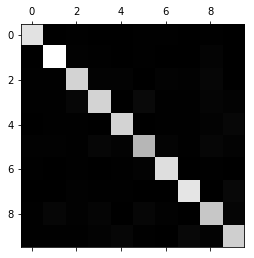

In [42]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
# 5s are a bit darker, which means there could be fewer 5s as on other digits
# or that the classifier does not perform as well on 5s as on other digits

In [43]:
# Focus on errors, divide each value in the confusion matrix by the number of images in the corresponding class
# so you can compare error rates instead of absolute number of errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

In [44]:
norm_conf_mx

array([[9.67077495e-01, 5.06500084e-04, 4.72733412e-03, 1.85716698e-03,
        1.85716698e-03, 8.27283471e-03, 7.09100118e-03, 1.85716698e-03,
        6.24683437e-03, 5.06500084e-04],
       [1.48323939e-04, 9.61435776e-01, 7.56452091e-03, 4.00474637e-03,
        7.41619697e-04, 5.19133788e-03, 7.41619697e-04, 1.77988727e-03,
        1.64639573e-02, 1.92821121e-03],
       [8.22423632e-03, 6.21013763e-03, 9.00469956e-01, 1.51057402e-02,
        1.40986908e-02, 3.35683115e-03, 1.42665324e-02, 1.00704935e-02,
        2.56797583e-02, 2.51762336e-03],
       [7.17664329e-03, 6.85043223e-03, 2.49551460e-02, 8.71962160e-01,
        3.26211059e-04, 3.76773773e-02, 5.38248247e-03, 8.15527646e-03,
        2.23454575e-02, 1.51688142e-02],
       [2.90996234e-03, 4.96405341e-03, 6.16227319e-03, 1.71174255e-03,
        9.19205751e-01, 1.36939404e-03, 8.38753851e-03, 5.99109894e-03,
        1.47209860e-02, 3.45771996e-02],
       [1.23593433e-02, 9.59232614e-03, 6.08743774e-03, 3.19129312e-02,
   

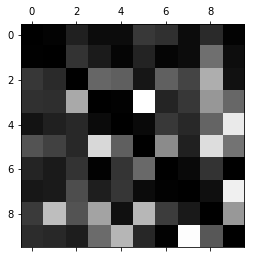

In [45]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

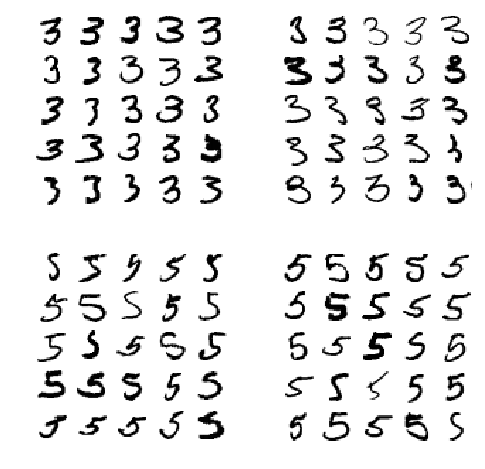

In [46]:
# column 8 and 9 are quite bright, which means many images get misclassified
# Rows for 8 9 are bright too, means 8 and 0 are usually confused with other digits
# you could try gather more data for 5 and 3 digits (they are easily confused with each other)
# or you could engineer more features to help with the classifier e.g write an algorithm to compute the number of
# closed loops

# We can also investigate individual errors

def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")
    
# EXTRA
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")
    
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


                                                                          

In [47]:
# Onew way to imporve is to ensure they are all centered and not too rotated

In [48]:
## 3.6 MultiLabel Classification
# Some times you may want your classifier to output multiple labels for an instance
# Say it is trained to recognize Alice Bob and Charlie, when Alice and Charlie pops up, the classifier
# should be able to recognize both
# This kind of system is called Multilabel classification system

from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel

array([[False, False],
       [ True, False],
       [False,  True],
       ...,
       [False, False],
       [False,  True],
       [False,  True]])

In [49]:
# KNeighborsClassifier supports multilabel classification, but not all classifiers do
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [50]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [51]:
# Measure a Multilabel classifier
# use F1 score for each individual label then simply calculate the average score
#y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)
#f1_score(y_multilabel, y_train_knn_pred, average="macro")

In [52]:
# but if you want give more weight to classifier's score on pictures of Alice
# one option is to give each label a weight equal to its support (number of instances with that target label)
# set average = "weighted"

In [53]:
## 3.7 Multioutput classification
# a generalization of Multilabel classification, where each label can have multiple classes

# Start by creating the training and test set by taking MNIST images and adding noises to their pixels
# using numpy's randint() function the target images will be the original images
import numpy.random as rnd

noise = rnd.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = rnd.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test



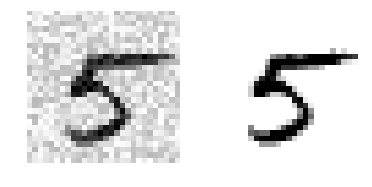

In [54]:
some_index = 5500
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

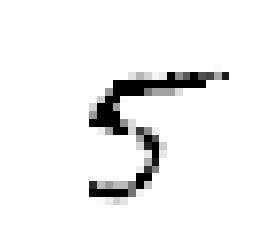

In [55]:
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)
